In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### THE MACROECONOMIC IS-LM MODEL:

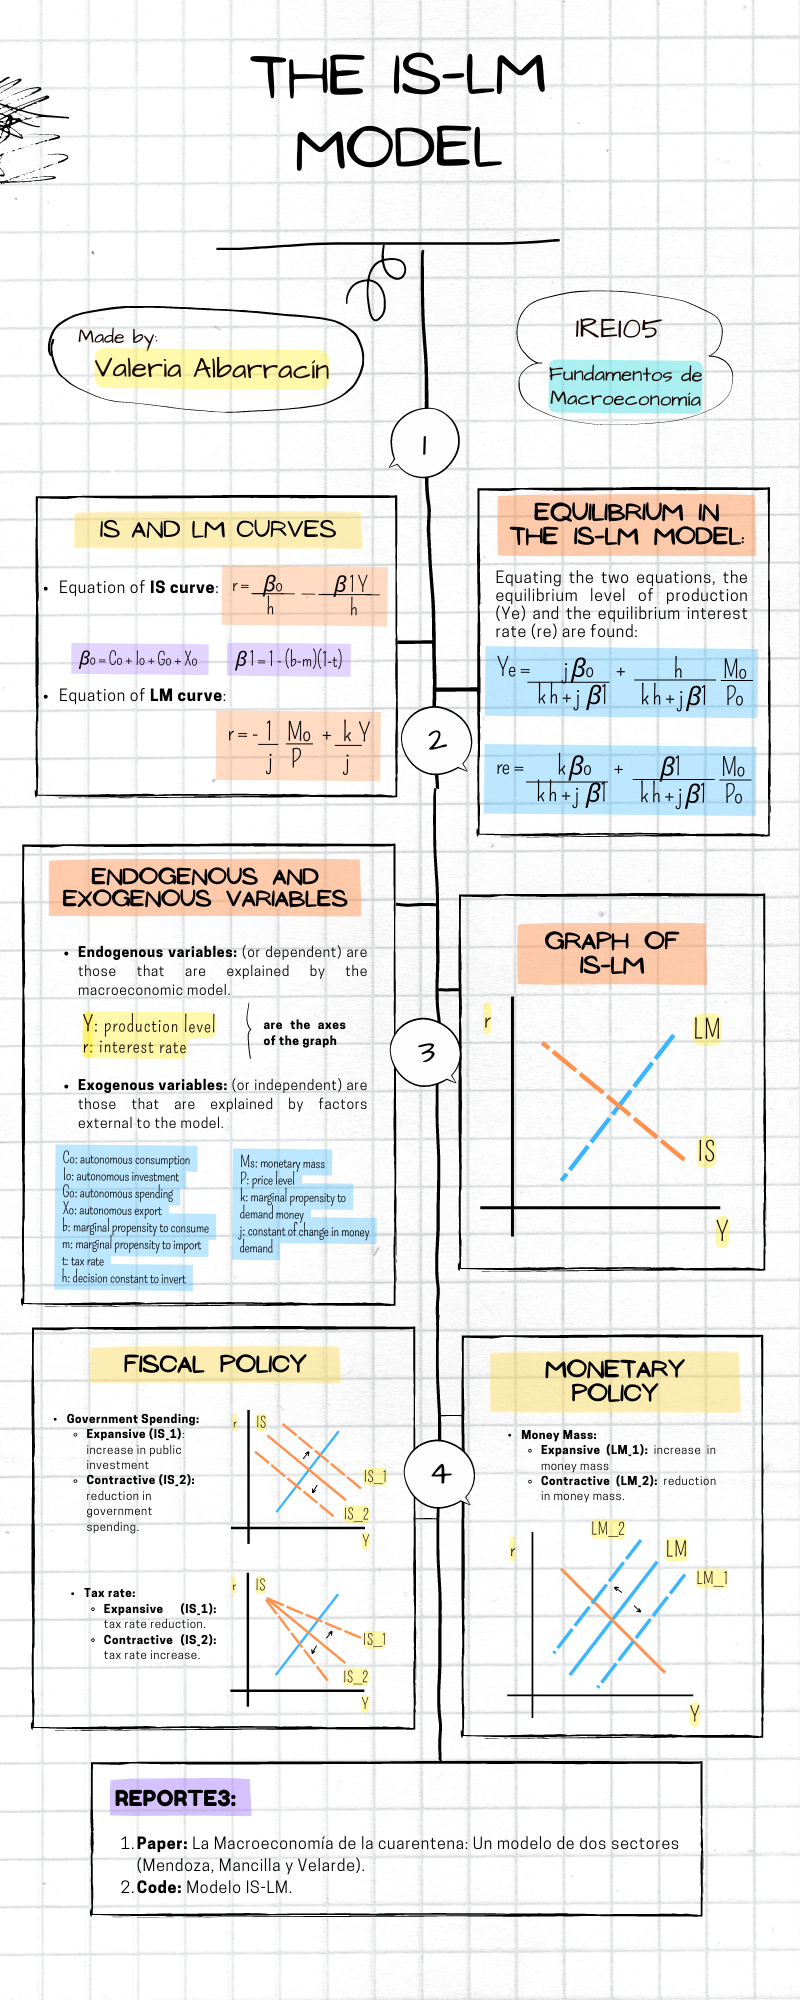

#### 1. Equilibrium in the IS-LM Model:

Considering, on the one hand, the equation of the IS Curve:

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Where $ B_0 = C_o + I_o + G_o + X_o $ and $ B_1 = 1 - (b - m)(1 - t) $

And, on the other hand, the equation of the LM Curve:

$$  r = -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y $$

Both equations can be equalized, substituted or reduced to find the equilibrium level of income $(Y^e)$ and the equilibrium Interest Rate $(r^e)$:

$$ -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- The equilibrium level of Income:

$$ Y^e = \frac{j B_o}{k h + j B_1} + (\frac{h}{k h + j B_1})\frac{Ms_o}{P_o} $$

- The equilibrium Interest Rate:

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$


#### 2. Equilibrium graph in the IS-LM model:

In [20]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

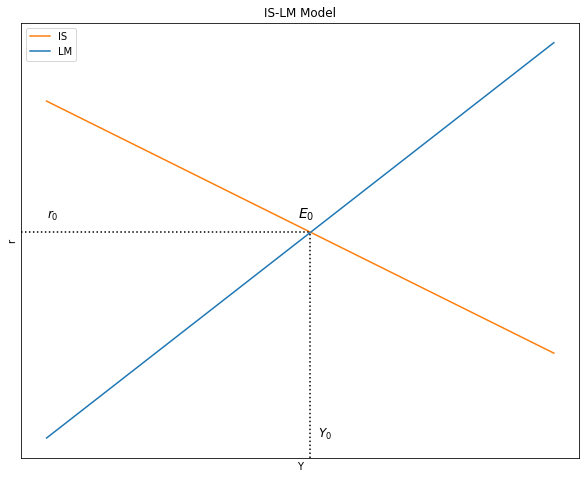

In [96]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS
ax.plot(Y, i, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
plt.axvline(x=51.5,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

#### 3. Comparative statics:

#### - Expansionary monetary policy and restrictive fiscal policy:

In [97]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # NUEVA curva IS: reducción Gasto de Gobienro (Go)
    
# Definir SOLO el parámetro cambiado
Go = 30

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)



#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
Ms = 700

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

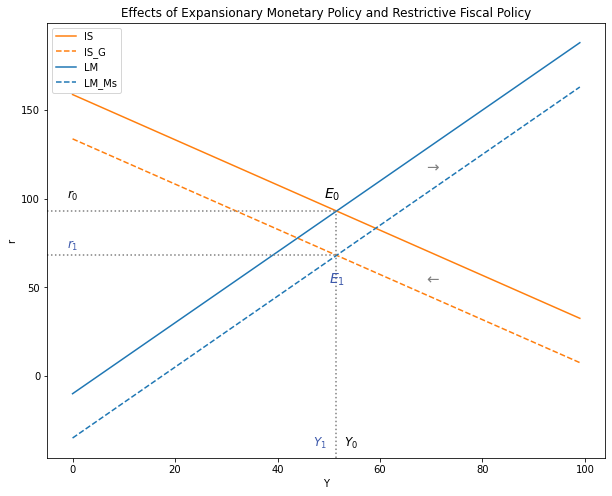

In [100]:
    # Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS_orginal
ax.plot(Y, r_G, label = "IS_G", color = "C1", linestyle = 'dashed') #IS_G

ax.plot(Y, i, label="LM", color = "C0")  #LM_original
ax.plot(Y, i_Ms, label="LM_Ms", color = "C0", linestyle = 'dashed')  #LM_Ms

# Texto y figuras agregadas
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

plt.text(69, 115, '→', fontsize=15, color='grey')
plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Effects of Expansionary Monetary Policy and Restrictive Fiscal Policy", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()
